In [1]:
import numpy as np
import pandas as pd

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 365
np.random.seed(seed=1960)

df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "idx" : np.arange(N)})
df_train["T"] = df_train["idx"] * 0.05
df_train["S"] = df_train["idx"].apply(lambda x : np.mod(x, 12))
df_train["Noise"] = 0.1 * np.random.standard_normal()
df_train["Signal_T_S_R"] = df_train["T"] + df_train["S"] + df_train["Noise"]
df_train["Signal_TS_R"] = df_train["T"] * df_train["S"] + df_train["Noise"]
df_train["Signal_TSR"] = df_train["T"] * df_train["S"] * df_train["Noise"]
df_train["Signal_Constant"] = 4.0
print(df_train.head(24))



         Date  idx     T   S    Noise  Signal_T_S_R  Signal_TS_R  Signal_TSR  \
0  2016-01-25    0  0.00   0  0.19049       0.19049      0.19049    0.000000   
1  2016-01-26    1  0.05   1  0.19049       1.24049      0.24049    0.009524   
2  2016-01-27    2  0.10   2  0.19049       2.29049      0.39049    0.038098   
3  2016-01-28    3  0.15   3  0.19049       3.34049      0.64049    0.085720   
4  2016-01-29    4  0.20   4  0.19049       4.39049      0.99049    0.152392   
5  2016-01-30    5  0.25   5  0.19049       5.44049      1.44049    0.238112   
6  2016-01-31    6  0.30   6  0.19049       6.49049      1.99049    0.342881   
7  2016-02-01    7  0.35   7  0.19049       7.54049      2.64049    0.466700   
8  2016-02-02    8  0.40   8  0.19049       8.59049      3.39049    0.609567   
9  2016-02-03    9  0.45   9  0.19049       9.64049      4.24049    0.771483   
10 2016-02-04   10  0.50  10  0.19049      10.69049      5.19049    0.952448   
11 2016-02-05   11  0.55  11  0.19049   

In [2]:
import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()
lSignal = 'Signal_Constant'
lEngine.mOptions.enable_slow_mode();
lEngine.mOptions.mDebugPerformance = True;


In [3]:
# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = lSignal, iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());


INFO:pyaf.std:START_TRAINING 'Signal_Constant'
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.

/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: 

/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: 

/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: 

/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/antoine/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 14.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 76.0, 0.5942)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 12.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 76.0, 0.6756)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 110.0, 0.0628)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 110.0, 1.411)
INFO:pyaf.st

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 135.0, 1.9578)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 32.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_residue_NoAR'), 30.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 76.0, 0.4222)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 14.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 76.0, 0.5942)
INFO:pyaf.std:collectPerform

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 72.0, 0.5942)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 8.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 72.0, 0.6756)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 106.0, 0.0628)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 106.0, 1.411)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_LinearTrend_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 136, 11.4444)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 31, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 77, 1.0908)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 77, 1.4846)
INFO:pyaf.std:collectPerformanceIndices

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 136, 0.1637)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 136, 4.644)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 72, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 136, 11.4444)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 31, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MA

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 73, 1.0908)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 73, 1.4846)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 73, 1.9824)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_LinearTrend_residue_Seasonal_Wee

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 137, 0.7984)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 73, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 137, 0.8636)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 32, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 78, 41066151.2498)
INFO:pyaf.std:collectPerformanceIndices : 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 39, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 103, 4.0864)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 137, 0.2414)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 137, 0.7984)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 73, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 137, 0.8636)
INFO:pyaf.std:collectPerformanceIndices

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_zeroCycle[1.0]_residue_NoAR'), 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 74, 41066151.2498)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 74, 2197923.7332)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 73.0, 85.2743)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 73.0, 96.9446)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 107.0, 8.7996)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', '

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 102.0, 96.9446)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 136.0, 8.7996)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 136.0, 202.4803)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 136.0, 276.7331)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_N

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 27.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_zeroCycle[0.0]_residue_NoAR'), 25.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 102.0, 60.5903)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 40.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 102.0, 85.2743)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 38.0, 0.0)
INFO:

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_NoAR'), 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 21, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 55, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 14, 0.0)
INFO:pyaf.std:collect

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'Diff_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'Diff_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'Diff_Signal_Constant_LinearTrend_residue_zeroCycle[1.0]_residue_NoAR'), 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'Diff_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'Diff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 47, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'Diff_Signal_Constant_PolyTrend_residue_bestCy

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 54.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_N

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_NoAR'), 10.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_zeroCycle[0.0]_residue_NoAR'), 8.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 22.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 20.0, 0.0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 113.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 113.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 49.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 113.

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 2, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'RelDiff_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'RelDiff_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'RelDiff_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'RelDiff_Signal_Constant_Lag1Trend_residue_zeroCycle[1.0]_residue_NoAR'), 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'RelDiff_Signal

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_zeroCycle[1.0]_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 44, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_LGB(64)'), 69.0, 0.007)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 5.0, 0.007)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_SVR(64)'), 69.0, 0.0069)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_AR(64)'), 67.0, 0.007)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_LGB(64)'), 67.0, 0.007)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', N

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 54.0, 0.0769)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 118.0, 0.0852)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_AR(64)'), 79.0, 0.0146)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_LGB(64)'), 79.0, 0.0839)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 15.0, 0.0839)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_SVR(6

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 111.0, 0.035)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_AR(64)'), 72.0, 0.0135)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_LGB(64)'), 72.0, 0.035)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 8.0, 0.035)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_SVR(64)'), 72.0, 0.0329)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_zeroCycle[0.0]_residue_AR(64)'), 70.0, 0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_AR(64)'), 91.0, 0.0147)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_LGB(64)'), 91.0, 0.1372)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 27.0, 0.1678)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_SVR(64)'), 91.0, 0.1446)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_zeroCycle[0.0]_residue_AR(64)'), 89.0, 0.0147)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_zeroCycle[0.0]_residue_LGB(64)'), 89.0, 0.1

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_LGB(64)'), 74.0, 0.0489)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 10.0, 0.049)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_SVR(64)'), 74.0, 0.0453)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_AR(64)'), 72.0, 0.0143)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_LGB(64)'), 72.0, 0.0489)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_NoAR'), 8.0, 0.035)
INFO:pya

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 108, 11.6066)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_AR(64)'), 69, 0.0036)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_LGB(64)'), 69, 0.0298)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 5, 0.0692)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_SVR(64)'), 69, 0.0452)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 67, 0.3647)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 131, 10.7828)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_AR(64)'), 92, 0.031)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_LGB(64)'), 92, 0.185)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 28, 0.225)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_SVR(64)'), 92, 0.1894)


INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_AR(64)'), 75, 0.0252)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_LGB(64)'), 75, 0.0577)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_NoAR'), 11, 0.0689)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_SVR(64)'), 75, 0.0579)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_zeroCycle[1.0]_residue_AR(64)'), 73, 0.0143)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_zeroCycle[1.0]_residue_LGB(64)'), 73, 0.0489)
INFO:pyaf.std

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 34, 0.2772)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 98, 0.2362)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_AR(64)'), 96, 0.0149)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_LGB(64)'), 96, 0.1471)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 32, 0.1556)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_SVR(64)'), 96, 0.1781)
INFO:pyaf.std:colle

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_SVR(64)'), 69, 1.0778)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_AR(64)'), 67, 0.0722)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_LGB(64)'), 67, 0.8645)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 3, 1.4948)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_SVR(64)'), 67, 0.3557)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', Non

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_AR(64)'), 72, 0.0809)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_LGB(64)'), 72, 0.2203)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 8, 0.1993)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_SVR(64)'), 72, 0.1112)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_AR(64)'), 70, 0.0407)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Sign

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_LGB(64)'), 99, 0.6888)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 35, 0.2772)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 99, 0.198)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_AR(64)'), 97, 0.0843)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_LGB(64)'), 97, 0.5881)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 33, 0.1556)
INFO:pyaf.std:coll

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_SVR(64)'), 81, 0.1441)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_AR(64)'), 79, 0.0749)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_LGB(64)'), 79, 0.3633)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 15, 0.0612)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_SVR(64)'), 79, 0.14)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 98, 288107195.7985)
INFO:pyaf.std:c

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_LGB(64)'), 72, 0.1525)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 8, 0.0245)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_SVR(64)'), 72, 0.126)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 81, 221447362.5026)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 81, 1025714126.1772)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 17, 0.0984)
INFO:pya

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 85.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_CROSTON(0.1)'), 57.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 55.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_CROSTON(0.1)'), 50.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_LGB(64)'), 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 48.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_zeroCycle[0.0]_residue_AR(64)'), 96.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_zeroCycl

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 35.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seas

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 74, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 108, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 108, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 44, 0.0)
INFO:pyaf.std:

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 22, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 86, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 120, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 120, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_Wee

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 99, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_AR(64)'), 97, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_CROSTON(0.1)'), 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_LGB(64)'), 97, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'),

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 98, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 98, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYea

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 109, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 109, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 4, 0.0)
INFO:pyaf.std:collectPerformance

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 121, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 57, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 121, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(6

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 87, 0.0117)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 25, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 87, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 23, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 87, 0.0112)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYe

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 116, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 116, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 52, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 116, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_zeroCycle[1.0]_residue_NoAR'), 11, 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 76.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 110.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 110.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 46.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 110.0, 0.0)
INFO:pyaf.std:col

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 14.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seas

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 28.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_zeroCycle[0.0]_residue_NoAR'), 26.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 41.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_Da

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 76, 0.012)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 76, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 76, 0.0121)
INFO:pyaf.std:collectPerfo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 98, 0.012)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 98, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 98, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Season

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 115, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_AR(64)'), 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_CROSTON(0.1)'), 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_LGB(64)'), 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 79, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 113, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 113, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 49, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 76, 0.0112)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 46, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 110, 0.0)
INFO:pyaf.std:collectPer

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 105, 0.0117)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 43, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 105, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 41, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 105, 0.0112)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekO

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45.0, 0.0)
INFO:pyaf.std:collectPerformance

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 67.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasona

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 55.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_zeroCycle[0.0]_residue_NoAR'), 14.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_resid

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 74, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 74, 0.0121)
INFO:pyaf.std:coll

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_NoAR'), 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 24, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 86, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 22, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seaso

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 81, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 115, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 113, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 81, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 19, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'),

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_zeroCycle[1.0]_residue_NoAR'), 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 78, 0.0117)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 78, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE',

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 80, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 80, 0.0106)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 114, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_resi

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 80, 0.0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 6.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR'), 4.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 12.0, 0.0)
INFO:pyaf.std:collectPerformanceIn

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 28.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_zeroCycle[0.0]_residue_NoAR'), 26.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 41.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_Da

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_We

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 108, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 44, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 108, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 3, 0.0)
INFO:pyaf.std:collectPerformanceIndic

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 120, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 56, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 120, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(6

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 24, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 22, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residu

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_zeroCycle[1.0]_residue_NoAR'), 10, 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 112, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 112, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 48, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 112, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_NoAR'), 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 82, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 20, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 82, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 18, 0.0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 80, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 114, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 114, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 50, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 11

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 34.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_zeroCycle[0.0]_residue_NoAR'), 32.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_r

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 41.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 39.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasona

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 109.0, 0.0)
INFO:pyaf.std:collectPerforman

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_NoAR'), 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_NoAR'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_zeroCycle[1.0]_residue_NoAR'), 10, 0.0)
INFO:pyaf.

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 30, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_zeroCycle[1.0]_residue_NoAR'), 28, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 41, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 34, 0.0)
INFO:pyaf

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'Quantized_5_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'Quantized_5_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_NoAR'), 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 85.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 23.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 85.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Movin

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 18.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Se

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 48.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_zeroCycle[0.0]

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 44.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 5.0, 0.0)
INFO:pyaf.std

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 49, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 8, 0.0)
INFO:pya

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 69, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 30, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_zeroCycle[1.0]_residue_NoAR'), 28, 0.0)
INFO:pyaf

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 55.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_zeroCycle[0.0]_residue_NoAR'), 14.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfW

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_NoAR'), 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 9.0, 0.0)
INFO:pyaf.std:collectPerformanceInd

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 110.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 7.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_zeroCycle[0.0]_residue_NoAR'), 5.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 22, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 56, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', '

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 46, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_Lag1Trend_residue_zeroCycle[1.0]_residue_NoAR'), 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', (

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 52, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_zeroCycle[1.0]_residue_NoAR'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'Quantized_20_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'Quantized_20_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'Quantized_20_Signal_Co

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 107.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 107.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 43.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 107.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_zeroCycle[0.0]_residue_NoAR'), 31.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 77.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 77.0, 0.0)
I

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 38.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 102.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 136.0, 0.

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 109, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_zeroCycle[1.0]_residue_NoAR'), 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Line

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 41, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 39, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 137, 0.0)
INFO:

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 67, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 131, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 28, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_zeroCycle[1.0]_residue_NoAR'), 26, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 41, 0.0)
INFO:pyaf.std:collectPe

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 76, nan)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Consta

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 68, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 29, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_zeroCycle[1.0]_residue_NoAR'), 27, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 104, 0.0)
INFO:pyaf.std:collectPerfo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 98, nan)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 98, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 68, 0.0)
INFO:pyaf.std:collectPer

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 106.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 3.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_zeroCycle[0.0]_residue_NoAR'), 1.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 12.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant'

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_zeroCycle[0.0]_residue_NoAR'), 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 96.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 34.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 96.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 32.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 96.

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 54.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 15.0,

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_NoAR'), 8.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 43, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 2, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_Lag1T

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 48, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 50, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_zeroCycle[1.0]_residue_NoAR'), 27, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 40, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscom

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 77.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 111.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 111.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 47.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_SVR

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_residue_NoAR'), 31.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 77.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'Anscombe_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'Anscombe_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'Anscombe_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'Anscombe_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'Anscombe_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Si

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 39, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 137, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 137, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 73, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 1

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 28, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_zeroCycle[1.0]_residue_NoAR'), 26, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 41, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 103, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 39, 0.0)
INFO:py

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 76, 52.654)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 98, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 68, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 29, 0.0)


INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 98, 3102.3566)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 98, 52.654)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 98, 0.0)
I

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'NoTransf_MovingAverage(12)_Seasonal_DayOfWeek_SVR', 83.0, 0.6756)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_AR', 117.0, 0.0512)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_LGB', 117.0, 1.411)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 53.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_W

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'NoTransf_MovingAverage(5)_Cycle_2_NoAR', 7.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_zeroCycle[0.0]_residue_NoAR'), 'NoTransf_MovingAverage(5)_NoCycle_NoAR', 5.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_AR', 78.0, 0.4222)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_CROSTON', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'NoTransf_MovingA

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'NoTransf_MovingMedian(30)_Seasonal_DayOfWeek_SVR', 101.0, 0.6756)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_AR', 135.0, 0.0512)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_LGB', 135.0, 1.411)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 71.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYea

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_ConstantTrend_residue_zeroCycle[0.0]_residue_NoAR'), 'NoTransf_ConstantTrend_NoCycle_NoAR', 0.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_AR', 73.0, 0.4222)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_CROSTON', 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_LGB', 73.0, 0.5942)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'T+S+R', None, '_Signal_Constant_Lag1Trend_residue_Season

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'NoTransf_MovingAverage(12)_Seasonal_DayOfWeek_SVR', 84, 1.992)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_AR', 118, 0.1364)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_LGB', 118, 4.644)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 54, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_resi

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'NoTransf_MovingAverage(5)_NoCycle_NoAR', 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_AR', 79, 1.0933)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_CROSTON', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 79, 1.4765)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'NoTransf_Movi

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_AR', 136, 0.1364)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_LGB', 136, 4.644)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 72, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 136, 11.5442)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoA

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_AR', 74, 1.0933)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_CROSTON', 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_LGB', 74, 1.4765)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_NoAR', 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TS+R', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_Da

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_LGB', 119, 0.7984)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 55, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'NoTransf_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 119, 0.8636)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'NoTransf_MovingAverage(12)_Cycle_2_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'NoTransf_Mo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_CROSTON', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 80, 799611.6984)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'NoTransf_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 80, 4.9746)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 73, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'NoTransf_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 137, 0.8636)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'NoTransf_MovingMedian(30)_Cycle_2_NoAR', 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'NoTransf_MovingMedian(30)_NoCycle_NoAR', 32, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'NoTransf_MovingMedian(5)_Seasonal_DayO

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_LGB', 75, 799611.6984)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'NoTransf_Lag1Trend_Seasonal_DayOfWeek_SVR', 75, 4.9746)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'NoTransf_Lag1Trend_Seasonal_WeekOfYear_AR', 109, 0.2142)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('_Signal_Constant', 'TSR', None, '_Signal_Constant_Lag1Trend_residue_Seasonal_WeekO

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Difference_ConstantTrend_Seasonal_WeekOfYear_NoAR', 42.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Difference_ConstantTrend_Seasonal_WeekOfYear_SVR', 106.0, 632.7161)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'Difference_ConstantTrend_Cycle_2_NoAR', 3.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_ConstantTrend_residue_zeroCycle[0.0]_residue_NoAR'), 'Difference_ConstantTrend_NoCycle_NoAR', 1.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', N

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'Diff_Signal_Constant_PolyTrend_residue_zeroCycle[0.0]_residue_NoAR'), 'Difference_PolyTrend_NoCycle_NoAR', 4.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Difference_MovingAverage(12)_Seasonal_DayOfWeek_AR', 84.0, 136.1699)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Difference_MovingAverage(12)_Seasonal_DayOfWeek_CROSTON', 22.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Difference_MovingAverage(12)_Seasonal_DayOfWeek_LGB', 84.0, 191.6444)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Difference_MovingAverage(5)_Seasonal_DayOfWeek_NoAR', 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Difference_MovingAverage(5)_Seasonal_DayOfWeek_SVR', 77.0, 217.872)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Difference_MovingAverage(5)_Seasonal_WeekOfYear_AR', 111.0, 17.9432)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Difference_MovingAverage(5)_Seasonal_WeekOfYear_LGB', 111.0, 455.0515)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingAverage

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Difference_MovingMedian(24)_Seasonal_WeekOfYear_SVR', 130.0, 632.7161)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 'Difference_MovingMedian(24)_Cycle_2_NoAR', 27.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_zeroCycle[0.0]_residue_NoAR'), 'Difference_MovingMedian(24)_NoCycle_NoAR', 25.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Difference_MovingMedian(30)_Seasonal_DayOfWeek_AR', 102.0, 136.1699)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_resi

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'Difference_ConstantTrend_Cycle_2_NoAR', 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'Difference_ConstantTrend_NoCycle_NoAR', 2, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Difference_Lag1Trend_Seasonal_DayOfWeek_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Difference_Lag1Trend_Seasonal_WeekOfYear_NoAR', 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'Diff_Signal_Constant_Lag1Trend_re

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Difference_MovingMedian(24)_Seasonal_WeekOfYear_NoAR', 67, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 'Difference_MovingMedian(24)_Cycle_2_NoAR', 28, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_zeroCycle[1.0]_residue_NoAR'), 'Difference_MovingMedian(24)_NoCycle_NoAR', 26, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Difference_MovingMedian(30)_Seasonal_DayOfWeek_NoAR', 39, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Difference_Mo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Difference_MovingAverage(30)_Seasonal_DayOfWeek_NoAR', 40, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Difference_MovingAverage(30)_Seasonal_WeekOfYear_NoAR', 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Difference_MovingAverage(30)_Cycle_2_NoAR', 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Difference_MovingAverage(30)_NoCycle_NoAR', 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Diff_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Difference_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'RelativeDifference_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 54.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'RelativeDifference_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'RelativeDifference_MovingAverage(12)_Cycle_2_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_zeroCycle[0.0]_residue_NoAR'), 'RelativeDifference_MovingAverage(12)_NoCycle_NoAR', 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'Mo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_zeroCycle[0.0]_residue_NoAR'), 'RelativeDifference_MovingAverage(5)_NoCycle_NoAR', 6.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'RelativeDifference_MovingAverage(7)_Seasonal_DayOfWeek_AR', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'RelativeDifference_MovingAverage(7)_Seasonal_DayOfWeek_CROSTON', 17.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'RelativeDifference_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R',

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'RelativeDifference_MovingMedian(30)_Seasonal_DayOfWeek_LGB', 102.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'RelativeDifference_MovingMedian(30)_Seasonal_DayOfWeek_NoAR', 38.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'RelativeDifference_MovingMedian(30)_Seasonal_DayOfWeek_SVR', 102.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'RelativeDifference_MovingMedian(30)_Seasonal_WeekOfYear_AR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constan

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'RelativeDifference_ConstantTrend_Seasonal_WeekOfYear_AR', 106.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'RelativeDifference_ConstantTrend_Seasonal_WeekOfYear_LGB', 106.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'RelativeDifference_ConstantTrend_Seasonal_WeekOfYear_NoAR', 42.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'RelativeDifference_ConstantTrend_Seasonal_WeekOfYear_SVR', 106.0, 0.

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'RelativeDifference_PolyTrend_Seasonal_WeekOfYear_LGB', 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'RelativeDifference_PolyTrend_Seasonal_WeekOfYear_NoAR', 45.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'RelativeDifference_PolyTrend_Seasonal_WeekOfYear_SVR', 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'T+S+R', None, 'RelDiff_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'RelativeDifference_PolyTrend_Cycle_2_NoAR', 6.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MA

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'RelativeDifference_MovingMedian(5)_Seasonal_DayOfWeek_NoAR', 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'RelativeDifference_MovingMedian(5)_Seasonal_WeekOfYear_NoAR', 48, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'RelativeDifference_MovingMedian(5)_Cycle_2_NoAR', 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'RelativeDifference_MovingMedian(5)_NoCycle_NoAR', 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOf

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'RelativeDifference_MovingAverage(5)_Seasonal_WeekOfYear_NoAR', 49, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'RelativeDifference_MovingAverage(5)_Cycle_2_NoAR', 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'RelativeDifference_MovingAverage(5)_NoCycle_NoAR', 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'RelativeDifference_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'RelativeDifference_LinearTrend_Cycle_2_NoAR', 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_LinearTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'RelativeDifference_LinearTrend_NoCycle_NoAR', 4, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'RelativeDifference_PolyTrend_Seasonal_DayOfWeek_NoAR', 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', 'TSR', None, 'RelDiff_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'RelativeDifference_PolyTrend_Seasonal_WeekOfYear_NoAR', 47, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('RelDiff_Signal_Constant', '

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_LGB(64)'), 'Integration_Lag1Trend_NoCycle_LGB', 67.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR'), 'Integration_Lag1Trend_NoCycle_NoAR', 3.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_SVR(64)'), 'Integration_Lag1Trend_NoCycle_SVR', 67.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Integration_LinearTrend_Seasonal_DayOfWeek_AR', 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'CumSum_Signal_Constant_L

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Integration_MovingAverage(12)_Seasonal_DayOfWeek_LGB', 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Integration_MovingAverage(12)_Seasonal_DayOfWeek_NoAR', 20.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Integration_MovingAverage(12)_Seasonal_DayOfWeek_SVR', 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Integration_MovingAverage(12)_Seasonal_WeekOfYear_AR', 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingA

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Integration_MovingAverage(30)_Seasonal_WeekOfYear_SVR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_AR(64)'), 'Integration_MovingAverage(30)_Cycle_2_AR', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_LGB(64)'), 'Integration_MovingAverage(30)_Cycle_2_LGB', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Integration_MovingAverage(30)_Cycle_2_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_zeroCycle[0.0]_residue_NoAR'), 'Integration_MovingAverage(7)_NoCycle_NoAR', 8.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_zeroCycle[0.0]_residue_SVR(64)'), 'Integration_MovingAverage(7)_NoCycle_SVR', 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Integration_MovingMedian(12)_Seasonal_DayOfWeek_AR', 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Integration_MovingMedian(12)_Seasonal_DayOfWeek_LGB', 84.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_resid

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Integration_MovingMedian(30)_Seasonal_WeekOfYear_AR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Integration_MovingMedian(30)_Seasonal_WeekOfYear_LGB', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Integration_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Integration_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingM

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_SVR(64)'), 'Integration_MovingMedian(7)_Cycle_2_SVR', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_AR(64)'), 'Integration_MovingMedian(7)_NoCycle_AR', 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_LGB(64)'), 'Integration_MovingMedian(7)_NoCycle_LGB', 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_NoAR'), 'Integration_MovingMedian(7)_NoCycle_NoAR', 8.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_SVR(64)'), 'Integration_MovingMedian(7

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Integration_LinearTrend_Seasonal_DayOfWeek_AR', 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Integration_LinearTrend_Seasonal_DayOfWeek_LGB', 74, 0.1125)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Integration_LinearTrend_Seasonal_DayOfWeek_NoAR', 10, 0.1125)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Integration_LinearTrend_Seasonal_DayOfWeek_SVR', 74, 0.1109)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Sig

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Integration_MovingAverage(12)_Seasonal_WeekOfYear_LGB', 119, 0.1308)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Integration_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 55, 0.1308)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Integration_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 119, 0.1308)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_AR(64)'), 'Integration_MovingAverage(12)_Cycle_2_AR', 80, 0.0165)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(12

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 'Integration_MovingAverage(30)_Cycle_2_SVR', 98, 0.226)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_AR(64)'), 'Integration_MovingAverage(30)_NoCycle_AR', 96, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_LGB(64)'), 'Integration_MovingAverage(30)_NoCycle_LGB', 96, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Integration_MovingAverage(30)_NoCycle_NoAR', 32, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_SVR(64)'), 'Integration_Moving

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Integration_MovingMedian(12)_Seasonal_DayOfWeek_NoAR', 21, 0.2611)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Integration_MovingMedian(12)_Seasonal_DayOfWeek_SVR', 85, 0.2597)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Integration_MovingMedian(12)_Seasonal_WeekOfYear_AR', 119, 2.1761)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Integration_MovingMedian(12)_Seasonal_WeekOfYear_LGB', 119, 0.1308)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_AR(64)'), 'Integration_MovingMedian(30)_Cycle_2_AR', 98, 0.0264)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_LGB(64)'), 'Integration_MovingMedian(30)_Cycle_2_LGB', 98, 0.226)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Integration_MovingMedian(30)_Cycle_2_NoAR', 34, 0.226)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 'Integration_MovingMedian(30)_Cycle_2_SVR', 98, 0.226)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_AR(64)'), 'Integration_Mov

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_zeroCycle[1.0]_residue_SVR(64)'), 'Integration_MovingMedian(7)_NoCycle_SVR', 73, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Integration_ConstantTrend_Seasonal_DayOfWeek_AR', 74, 263811891.1874)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Integration_ConstantTrend_Seasonal_DayOfWeek_LGB', 74, 493756117.5584)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Integration_ConstantTrend_Seasonal_DayOfWeek_NoAR', 10, 1.0694)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_C

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Integration_LinearTrend_Seasonal_DayOfWeek_SVR', 75, 0.5314)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Integration_LinearTrend_Seasonal_WeekOfYear_AR', 109, 0.2547)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Integration_LinearTrend_Seasonal_WeekOfYear_LGB', 109, 0.9092)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'CumSum_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Integration_LinearTrend_Seasonal_WeekOfYear_NoAR', 45, 0.1184)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Cum

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_AR(64)'), 'Integration_MovingAverage(12)_Cycle_2_AR', 81, 0.1253)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_LGB(64)'), 'Integration_MovingAverage(12)_Cycle_2_LGB', 81, 0.1628)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Integration_MovingAverage(12)_Cycle_2_NoAR', 17, 0.1003)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_SVR(64)'), 'Integration_MovingAverage(12)_Cycle_2_SVR', 81, 0.1283)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_AR(64)'), 'Integrat

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Integration_MovingAverage(30)_NoCycle_NoAR', 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_SVR(64)'), 'Integration_MovingAverage(30)_NoCycle_SVR', 97, 0.1652)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Integration_MovingAverage(5)_Seasonal_DayOfWeek_AR', 79, 184436583.1908)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Integration_MovingAverage(5)_Seasonal_DayOfWeek_LGB', 79, 652239726.7679)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_Day

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Integration_MovingMedian(12)_Seasonal_WeekOfYear_AR', 120, 0.2923)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Integration_MovingMedian(12)_Seasonal_WeekOfYear_LGB', 120, 0.7412)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Integration_MovingMedian(12)_Seasonal_WeekOfYear_NoAR', 56, 0.1308)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Integration_MovingMedian(12)_Seasonal_WeekOfYear_SVR', 120, 0.7913)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Integration_MovingMedian(30)_Cycle_2_NoAR', 35, 0.226)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_SVR(64)'), 'Integration_MovingMedian(30)_Cycle_2_SVR', 99, 0.2396)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_AR(64)'), 'Integration_MovingMedian(30)_NoCycle_AR', 97, 0.0181)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_LGB(64)'), 'Integration_MovingMedian(30)_NoCycle_LGB', 97, 0.0375)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('CumSum_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Integration_MovingMedian

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-2.0)_ConstantTrend_Seasonal_WeekOfYear_NoAR', 43.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-2.0)_ConstantTrend_Cycle_2_NoAR', 4.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=-2.0)_ConstantTrend_NoCycle_NoAR', 2.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-2.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_Lag1Trend_Seasonal_DayOfWeek_AR', 75.0, 0.0)
INFO

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Cycle_8_LGB', 86.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Cycle_8_NoAR', 22.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Cycle_8_SVR', 86.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_zeroCycle[0.0]_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_NoCycle_AR', 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'Mo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_WeekOfYear_NoAR', 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_WeekOfYear_SVR', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Cycle_16_AR', 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Cycle_16_CROSTON', 50.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(7)_Seasonal_WeekOfYear_NoAR', 50.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(7)_Seasonal_WeekOfYear_SVR', 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(7)_Cycle_2_NoAR', 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(7)_NoCycle_NoAR', 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant'

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingMedian(30)_Cycle_2_NoAR', 34.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingMedian(30)_NoCycle_NoAR', 32.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(5)_Seasonal_DayOfWeek_AR', 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_MovingMedian(5)_Seasonal_DayOfWeek_CROSTON', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_Lag1Trend_Seasonal_DayOfWeek_AR', 76, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_Lag1Trend_Seasonal_DayOfWeek_CROSTON', 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_Lag1Trend_Seasonal_DayOfWeek_LGB', 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-2.0_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-2.0)_Lag1Trend_Seasonal_DayOfWeek_NoAR', 12, 0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Seasonal_DayOfWeek_AR', 86, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Seasonal_DayOfWeek_CROSTON', 24, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Seasonal_DayOfWeek_LGB', 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(12)_Seasonal_DayOfWeek_NoAR', 22, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(24)_NoCycle_NoAR', 27, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_zeroCycle[1.0]_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(24)_NoCycle_SVR', 91, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_DayOfWeek_AR', 104, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_DayOfWeek_CROSTON', 42, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Cons

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(5)_NoCycle_LGB', 72, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(5)_NoCycle_NoAR', 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(5)_NoCycle_SVR', 72, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(7)_Seasonal_DayOfWeek_AR', 81, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingAverag

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(30)_Seasonal_DayOfWeek_AR', 104, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_MovingMedian(30)_Seasonal_DayOfWeek_CROSTON', 42, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(30)_Seasonal_DayOfWeek_LGB', 104, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingMedian(30)_Seasonal_DayOfWeek_NoAR', 40, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('B

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-2.0)_ConstantTrend_Seasonal_DayOfWeek_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_ConstantTrend_Seasonal_DayOfWeek_SVR', 75, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_ConstantTrend_Seasonal_WeekOfYear_AR', 109, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_ConstantTrend_Seasona

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-2.0)_PolyTrend_Seasonal_DayOfWeek_NoAR', 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_PolyTrend_Seasonal_DayOfWeek_SVR', 78, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_PolyTrend_Seasonal_WeekOfYear_AR', 112, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'Box_Cox_-2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_PolyTrend_Seasonal_WeekOfYear_LGB', 112, 0.0)
INF

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_WeekOfYear_AR', 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_WeekOfYear_LGB', 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_WeekOfYear_NoAR', 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingAverage(30)_Seasonal_WeekOfYear_SVR', 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(12)_Seasonal_WeekOfYear_SVR', 121, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingMedian(12)_Cycle_2_NoAR', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingMedian(12)_NoCycle_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(24)_Seasonal_DayOfWeek_AR', 99, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None,

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(7)_Seasonal_DayOfWeek_AR', 82, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-2.0)_MovingMedian(7)_Seasonal_DayOfWeek_CROSTON', 20, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-2.0)_MovingMedian(7)_Seasonal_DayOfWeek_LGB', 82, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-2.0)_MovingMedian(7)_Seasonal_DayOfWeek_NoAR', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-2.0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-1.0)_LinearTrend_Seasonal_DayOfWeek_CROSTON', 12.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_LinearTrend_Seasonal_DayOfWeek_LGB', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-1.0)_LinearTrend_Seasonal_DayOfWeek_NoAR', 10.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_LinearTrend_Seaso

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_Seasonal_DayOfWeek_LGB', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_Seasonal_DayOfWeek_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_Seasonal_DayOfWeek_SVR', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_Seasonal_WeekOfYear_AR', 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('M

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(5)_Seasonal_WeekOfYear_SVR', 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(5)_Cycle_2_NoAR', 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(5)_NoCycle_NoAR', 7.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(7)_Seasonal_DayOfWeek_AR', 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', '

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(24)_Seasonal_WeekOfYear_AR', 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(24)_Seasonal_WeekOfYear_LGB', 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(24)_Seasonal_WeekOfYear_NoAR', 67.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(24)_Seasonal_WeekOfYear_SVR', 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('M

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(7)_Seasonal_WeekOfYear_NoAR', 50.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(7)_Seasonal_WeekOfYear_SVR', 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(7)_Cycle_2_NoAR', 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(7)_NoCycle_NoAR', 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R'

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-1.0)_LinearTrend_Seasonal_WeekOfYear_NoAR', 45, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_LinearTrend_Seasonal_WeekOfYear_SVR', 109, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_LinearTrend_Cycle_2_NoAR', 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'Box_Cox_-1.0_Signal_Constant_LinearTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-1.0)_LinearTrend_NoCycle_NoAR', 4, 0.0)
INFO:pyaf.std:co

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_Seasonal_WeekOfYear_SVR', 132, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_Cycle_2_NoAR', 29, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(24)_NoCycle_NoAR', 27, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(30)_Seasonal_DayOfWeek_AR', 104, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constan

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 81, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(7)_Seasonal_WeekOfYear_AR', 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(7)_Seasonal_WeekOfYear_LGB', 115, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(24)_Cycle_2_NoAR', 29, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(24)_NoCycle_NoAR', 27, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(30)_Seasonal_DayOfWeek_AR', 104, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-1.0)_MovingMedian(30)_Seasonal_DayOfWeek_CROSTON', 42, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', '

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-1.0)_ConstantTrend_Seasonal_DayOfWeek_CROSTON', 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_ConstantTrend_Seasonal_DayOfWeek_LGB', 75, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-1.0)_ConstantTrend_Seasonal_DayOfWeek_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_ConstantTrend_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-1.0)_PolyTrend_Seasonal_DayOfWeek_CROSTON', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_PolyTrend_Seasonal_DayOfWeek_LGB', 78, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-1.0)_PolyTrend_Seasonal_DayOfWeek_NoAR', 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'Box_Cox_-1.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_PolyTrend_Seasonal_DayOfWeek_SVR', 78, 0.0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingAverage(30)_Seasonal_DayOfWeek_NoAR', 41, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(30)_Seasonal_DayOfWeek_SVR', 105, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(30)_Seasonal_WeekOfYear_AR', 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_MovingAverage(30)_Seasonal_WeekOfYear_LGB', 139, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('B

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(12)_Seasonal_WeekOfYear_LGB', 121, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(12)_Seasonal_WeekOfYear_NoAR', 57, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(12)_Seasonal_WeekOfYear_SVR', 121, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(12)_Cycle_2_NoAR', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Cons

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(5)_Cycle_2_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=-1.0)_MovingMedian(5)_NoCycle_NoAR', 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=-1.0)_MovingMedian(7)_Seasonal_DayOfWeek_AR', 82, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=-1.0)_MovingMedian(7)_Seasonal_DayOfWeek_CROSTON', 20, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_-1.0_Signal_Constant', 'TSR', None, 'M

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=0.0)_Lag1Trend_NoCycle_NoAR', 4.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=0.0)_LinearTrend_Seasonal_DayOfWeek_AR', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=0.0)_LinearTrend_Seasonal_DayOfWeek_CROSTON', 12.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_LinearTrend_Seasonal_DayOfWeek_LGB', 74.0, 0.0)
INF

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_Seasonal_DayOfWeek_AR', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_Seasonal_DayOfWeek_CROSTON', 35.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_Seasonal_DayOfWeek_LGB', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_Seasonal_DayOfWeek_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAP

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(7)_Seasonal_WeekOfYear_AR', 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(30)_Seasonal_WeekOfYear_AR', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(30)_Seasonal_WeekOfYear_LGB', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=0.0)_ConstantTrend_Seasonal_WeekOfYear_NoAR', 44, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_ConstantTrend_Seasonal_WeekOfYear_SVR', 108, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=0.0)_ConstantTrend_Cycle_2_NoAR', 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=0.0)_ConstantTrend_NoCycle_NoAR', 3, 0.0)
INFO:pyaf.st

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_PolyTrend_Seasonal_WeekOfYear_SVR', 111, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=0.0)_PolyTrend_Cycle_2_NoAR', 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'Box_Cox_0.0_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=0.0)_PolyTrend_NoCycle_NoAR', 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(12)_Seasonal_DayOfWeek_AR', 86, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_C

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingAverage(30)_NoCycle_NoAR', 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(5)_Seasonal_DayOfWeek_AR', 79, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=0.0)_MovingAverage(5)_Seasonal_DayOfWeek_CROSTON', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(5)_Seasonal_DayOfWeek_LGB', 79, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Const

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(24)_Seasonal_DayOfWeek_LGB', 98, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingMedian(24)_Seasonal_DayOfWeek_NoAR', 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(24)_Seasonal_DayOfWeek_SVR', 98, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(24)_Seasonal_WeekOfYear_AR', 132, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Si

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(7)_Seasonal_WeekOfYear_AR', 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(7)_Seasonal_WeekOfYear_LGB', 115, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingMedian(7)_Seasonal_WeekOfYear_NoAR', 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(7)_Seasonal_WeekOfYear_SVR', 115, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Si

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_LinearTrend_Seasonal_WeekOfYear_LGB', 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=0.0)_LinearTrend_Seasonal_WeekOfYear_NoAR', 46, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_LinearTrend_Seasonal_WeekOfYear_SVR', 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'Box_Cox_0.0_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=0.0)_LinearTrend_Cycle_2_NoAR', 7, 0.0)
INFO:pyaf.std:

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_Seasonal_WeekOfYear_SVR', 133, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_Cycle_2_NoAR', 30, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingAverage(24)_NoCycle_NoAR', 28, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingAverage(30)_Seasonal_DayOfWeek_AR', 105, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None,

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(12)_Seasonal_DayOfWeek_AR', 87, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=0.0)_MovingMedian(12)_Seasonal_DayOfWeek_CROSTON', 25, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(12)_Seasonal_DayOfWeek_LGB', 87, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingMedian(12)_Seasonal_DayOfWeek_NoAR', 23, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=0.0)_MovingMedian(5)_Seasonal_DayOfWeek_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(5)_Seasonal_DayOfWeek_SVR', 80, 0.0121)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(5)_Seasonal_WeekOfYear_AR', 114, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=0.0)_MovingMedian(5)_Seasonal_WeekOfYear_LGB', 114, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_0.0_Signal_Constan

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=2.0)_Lag1Trend_Seasonal_WeekOfYear_AR', 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_Lag1Trend_Seasonal_WeekOfYear_LGB', 109.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=2.0)_Lag1Trend_Seasonal_WeekOfYear_NoAR', 45.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'Box_Cox_2.0_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_Lag1Trend_Seasonal_WeekOfYear_SVR', 109.0, 0.

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(12)_Seasonal_WeekOfYear_LGB', 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 55.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(12)_Cycle_2_NoAR', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(5)_Seasonal_WeekOfYear_SVR', 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(5)_Cycle_2_NoAR', 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_zeroCycle[0.0]_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(5)_NoCycle_NoAR', 7.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(7)_Seasonal_DayOfWeek_AR', 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', N

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(30)_Seasonal_DayOfWeek_AR', 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=2.0)_MovingMedian(30)_Seasonal_DayOfWeek_CROSTON', 41.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(30)_Seasonal_DayOfWeek_LGB', 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingMedian(30)_Seasonal_DayOfWeek_NoAR', 39.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=2.0)_ConstantTrend_Seasonal_DayOfWeek_NoAR', 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_ConstantTrend_Seasonal_DayOfWeek_SVR', 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=2.0)_ConstantTrend_Seasonal_WeekOfYear_AR', 108, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_ConstantTrend_Seasonal_WeekOfYea

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_PolyTrend_Seasonal_DayOfWeek_SVR', 77, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=2.0)_PolyTrend_Seasonal_WeekOfYear_AR', 111, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_PolyTrend_Seasonal_WeekOfYear_LGB', 111, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'Box_Cox_2.0_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=2.0)_PolyTrend_Seasonal_WeekOfYear_NoAR', 47, 0.0)
INFO:pyaf.st

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(30)_Seasonal_WeekOfYear_LGB', 138, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(30)_Seasonal_WeekOfYear_NoAR', 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(30)_Seasonal_WeekOfYear_SVR', 138, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(30)_Cycle_2_NoAR', 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_C

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingMedian(12)_Cycle_2_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingMedian(12)_NoCycle_NoAR', 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(24)_Seasonal_DayOfWeek_AR', 98, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=2.0)_MovingMedian(24)_Seasonal_DayOfWeek_CROSTON', 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=2.0)_MovingMedian(7)_Seasonal_DayOfWeek_CROSTON', 19, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(7)_Seasonal_DayOfWeek_LGB', 81, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingMedian(7)_Seasonal_DayOfWeek_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(7)_Seasonal_DayOfWeek_SVR', 81, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_C

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_LinearTrend_Seasonal_DayOfWeek_LGB', 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'BoxCox(Lambda=2.0)_LinearTrend_Seasonal_DayOfWeek_NoAR', 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_LinearTrend_Seasonal_DayOfWeek_SVR', 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'Box_Cox_2.0_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=2.0)_LinearTrend_Seasonal_WeekOfYear_AR', 110, 0.0)
INFO:

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(24)_Seasonal_DayOfWeek_SVR', 99, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(24)_Seasonal_WeekOfYear_AR', 133, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(24)_Seasonal_WeekOfYear_LGB', 133, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(24)_Seasonal_WeekOfYear_NoAR', 69, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(7)_Seasonal_WeekOfYear_NoAR', 52, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'BoxCox(Lambda=2.0)_MovingAverage(7)_Seasonal_WeekOfYear_SVR', 116, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(7)_Cycle_2_NoAR', 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingAverage(7)_NoCycle_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMe

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'BoxCox(Lambda=2.0)_MovingMedian(30)_NoCycle_NoAR', 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(5)_Seasonal_DayOfWeek_AR', 80, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'BoxCox(Lambda=2.0)_MovingMedian(5)_Seasonal_DayOfWeek_CROSTON', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'BoxCox(Lambda=2.0)_MovingMedian(5)_Seasonal_DayOfWeek_LGB', 80, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Box_Cox_2.0_Signal_Constant', 'TSR', No

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_MovingAverage(24)_Seasonal_DayOfWeek_LGB', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingAverage(24)_Seasonal_DayOfWeek_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_MovingAverage(24)_Seasonal_DayOfWeek_SVR', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_MovingAverage(24)_Seasonal_WeekOfYear_AR', 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Const

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_MovingAverage(7)_Seasonal_WeekOfYear_AR', 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Quantization_MovingAverage(7)_Seasonal_WeekOfYear_LGB', 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingAverage(7)_Seasonal_WeekOfYear_NoAR', 50.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Quantization_MovingAverage(7)_Seasonal_WeekOfYear_SVR', 114.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Const

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingMedian(30)_Cycle_2_NoAR', 34.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_residue_NoAR'), 'Quantization_MovingMedian(30)_NoCycle_NoAR', 32.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Quantization_MovingMedian(5)_Seasonal_DayOfWeek_AR', 78.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Quantization_MovingMedian(5)_Seasonal_DayOfWeek_CROSTON', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'MovingMedian(5

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Quantization_Lag1Trend_Seasonal_DayOfWeek_CROSTON', 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_Lag1Trend_Seasonal_DayOfWeek_LGB', 75.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_Lag1Trend_Seasonal_DayOfWeek_NoAR', 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'T+S+R', None, 'Quantized_5_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_Lag1Trend_Seasonal_DayOfWeek_SVR', 75.0, 0.0)
INFO:pyaf.std:collect

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingAverage(12)_Cycle_2_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_MovingAverage(12)_NoCycle_NoAR', 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingAverage(24)_Seasonal_DayOfWeek_NoAR', 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingAverage(24)_Seasonal_WeekOfYear_NoAR', 68, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residu

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'Quantized_5_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_ConstantTrend_Seasonal_DayOfWeek_NoAR', 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'Quantized_5_Signal_Constant_ConstantTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_ConstantTrend_Seasonal_WeekOfYear_NoAR', 44, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'Quantized_5_Signal_Constant_ConstantTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_ConstantTrend_Cycle_2_NoAR', 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TS+R', None, 'Quantized_5_Signal_Constant_ConstantTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_ConstantTrend_NoCycle_NoAR', 3, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingMedian(12)_Seasonal_WeekOfYear_NoAR', 57, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingMedian(12)_Cycle_2_NoAR', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_MovingMedian(12)_NoCycle_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingMedian(24)_Seasonal_DayOfWeek_NoAR', 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_5_Signal_Constant', 'TSR', None, 'MovingMedian(24)_residue_Seasonal_Wee

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_MovingAverage(12)_Seasonal_DayOfWeek_LGB', 85.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingAverage(12)_Seasonal_DayOfWeek_NoAR', 21.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_MovingAverage(12)_Seasonal_DayOfWeek_SVR', 85.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_MovingAverage(12)_Seasonal_WeekOfYear_AR', 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_MovingAverage(5)_Seasonal_WeekOfYear_AR', 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Quantization_MovingAverage(5)_Seasonal_WeekOfYear_LGB', 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingAverage(5)_Seasonal_WeekOfYear_NoAR', 48.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingAverage(5)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Quantization_MovingAverage(5)_Seasonal_WeekOfYear_SVR', 112.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Quantization_MovingMedian(24)_Seasonal_WeekOfYear_SVR', 131.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingMedian(24)_Cycle_2_NoAR', 28.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_zeroCycle[0.0]_residue_NoAR'), 'Quantization_MovingMedian(24)_NoCycle_NoAR', 26.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Quantization_MovingMedian(30)_Seasonal_DayOfWeek_AR', 103.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'MovingMedi

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Quantization_ConstantTrend_Seasonal_DayOfWeek_CROSTON', 11.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_ConstantTrend_Seasonal_DayOfWeek_LGB', 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_ConstantTrend_Seasonal_DayOfWeek_NoAR', 9.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_ConstantTrend_Seasonal_DayOfWeek

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_PolyTrend_Seasonal_DayOfWeek_LGB', 76.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_PolyTrend_Seasonal_DayOfWeek_NoAR', 12.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_PolyTrend_Seasonal_DayOfWeek_SVR', 76.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'T+S+R', None, 'Quantized_10_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_PolyTrend_Seasonal_WeekOfYear_AR', 110.0, 0.0)
INFO:pyaf.std:collect

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingMedian(30)_Seasonal_DayOfWeek_NoAR', 40, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 74, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingMedian(30)_Cycle_2_NoAR', 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_MovingMedian(30)_NoCycle_NoAR', 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Sea

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingAverage(30)_Seasonal_WeekOfYear_NoAR', 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingAverage(30)_Cycle_2_NoAR', 36, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingAverage(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_MovingAverage(30)_NoCycle_NoAR', 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingAverage(5)_Seasonal_DayOfWeek_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'MovingAverage(5)_residue_S

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'Quantized_10_Signal_Constant_Lag1Trend_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_Lag1Trend_NoCycle_NoAR', 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_LinearTrend_Seasonal_DayOfWeek_NoAR', 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_LinearTrend_Seasonal_WeekOfYear_NoAR', 46, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_10_Signal_Constant', 'TSR', None, 'Quantized_10_Signal_Constant_LinearTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_LinearTrend_Cycle_2_NoAR', 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantiz

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_MovingAverage(30)_Seasonal_WeekOfYear_AR', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Quantization_MovingAverage(30)_Seasonal_WeekOfYear_LGB', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingAverage(30)_Seasonal_WeekOfYear_NoAR', 73.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingAverage(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Quantization_MovingAverage(30)_Seasonal_WeekOfYear_SVR', 137.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Quantization_MovingMedian(12)_Seasonal_WeekOfYear_SVR', 119.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingMedian(12)_Cycle_2_NoAR', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(12)_residue_zeroCycle[0.0]_residue_NoAR'), 'Quantization_MovingMedian(12)_NoCycle_NoAR', 14.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Quantization_MovingMedian(24)_Seasonal_DayOfWeek_AR', 97.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedia

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Quantization_MovingMedian(7)_Seasonal_DayOfWeek_CROSTON', 18.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_MovingMedian(7)_Seasonal_DayOfWeek_LGB', 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingMedian(7)_Seasonal_DayOfWeek_NoAR', 16.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_MovingMedian(7)_Seasonal_DayOfWeek_SVR', 80.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Quantization_LinearTrend_Seasonal_DayOfWeek_LGB', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_LinearTrend_Seasonal_DayOfWeek_NoAR', 10.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_LinearTrend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Quantization_LinearTrend_Seasonal_DayOfWeek_SVR', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'T+S+R', None, 'Quantized_20_Signal_Constant_LinearTrend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Quantization_LinearTrend_Seasonal_WeekOfYear_AR', 108.0, 0.0)
INFO:

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_MovingAverage(5)_NoCycle_NoAR', 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingAverage(7)_Seasonal_WeekOfYear_NoAR', 51, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingAverage(7)_Cycle_2_NoAR', 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_zer

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_PolyTrend_Seasonal_DayOfWeek_NoAR', 13, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_PolyTrend_Seasonal_WeekOfYear_NoAR', 47, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_PolyTrend_Cycle_2_NoAR', 8, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TS+R', None, 'Quantized_20_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_PolyTrend_NoCycle_NoAR', 6, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Si

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_bestCycle_byMAPE_residue_NoAR'), 'Quantization_MovingMedian(5)_Cycle_2_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_zeroCycle[1.0]_residue_NoAR'), 'Quantization_MovingMedian(5)_NoCycle_NoAR', 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Quantization_MovingMedian(7)_Seasonal_DayOfWeek_NoAR', 18, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Quantization_MovingMedian(7)_Seasonal_WeekOfYear_NoAR', 52, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Quantized_20_Signal_Constant', 'TSR', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_NoAR', 10.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_SVR', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Logit_Lag1Trend_Seasonal_WeekOfYear_AR', 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Logit_Lag1Trend_Seasonal_WeekOfYear_LGB', 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'Logit_Sig

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Logit_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 54.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Logit_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Logit_MovingAverage(12)_Cycle_2_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_zeroCycle[0.0]_residue_NoAR'), 'Logit_MovingAverage(12)_NoCycle_NoAR', 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), '

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Logit_MovingAverage(7)_Seasonal_WeekOfYear_AR', 113.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Logit_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Logit_MovingMedian(30)_Cycle_2_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_residue_NoAR'), 'Logit_MovingMedian(30)_NoCycle_NoAR', 31.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Logit_MovingMedian(5)_Seasonal_DayOfWeek_AR', 77.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Logit_Mo

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_LGB', 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_SVR', 75, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Logit_Lag1Trend_Seasonal_WeekOfYear_AR', 109, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'Logit_Signal_Constant_Lag

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Logit_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 55, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Logit_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 119, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Logit_MovingAverage(12)_Cycle_2_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'Logit_MovingAverage(12)_NoCycle_NoAR', 14, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Logit_MovingA

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 80, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 80, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Logit_MovingAverage(7)_Seasonal_WeekOfYear_AR', 114, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_LGB(

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Logit_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 137, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Logit_MovingMedian(30)_Cycle_2_NoAR', 34, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Logit_MovingMedian(30)_NoCycle_NoAR', 32, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Logit_MovingMedian(5)_Seasonal_DayOfWeek_AR', 78, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TS+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Logit_MovingMedian(5)

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_NoAR', 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Logit_Lag1Trend_Seasonal_DayOfWeek_SVR', 76, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Logit_Lag1Trend_Seasonal_WeekOfYear_AR', 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Logit_Lag1Trend_Seasonal_WeekOfYear_LGB', 110, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'Logit_Signal_Constant_Lag1T

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Logit_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 120, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Logit_MovingAverage(12)_Cycle_2_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'Logit_MovingAverage(12)_NoCycle_NoAR', 15, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Logit_MovingAverage(24)_Seasonal_DayOfWeek_AR', 98, nan)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Logit_MovingAv

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Logit_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 81, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Logit_MovingAverage(7)_Seasonal_WeekOfYear_AR', 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Logit_MovingAverage(7)_Seasonal_WeekOfYear_LGB', 115, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_NoAR')

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Logit_MovingMedian(30)_Cycle_2_NoAR', 35, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(30)_residue_zeroCycle[1.0]_residue_NoAR'), 'Logit_MovingMedian(30)_NoCycle_NoAR', 33, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Logit_MovingMedian(5)_Seasonal_DayOfWeek_AR', 79, nan)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Logit_MovingMedian(5)_Seasonal_DayOfWeek_CROSTON', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Logit_Signal_Constant', 'TSR', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Logit_MovingMedian(5)_Seaso

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Fisher_Lag1Trend_Seasonal_DayOfWeek_NoAR', 10.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_Lag1Trend_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Fisher_Lag1Trend_Seasonal_DayOfWeek_SVR', 74.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Fisher_Lag1Trend_Seasonal_WeekOfYear_AR', 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'Fisher_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Fisher_Lag1Trend_Seasonal_WeekOfYear_LGB', 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', Non

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Fisher_MovingAverage(12)_Seasonal_WeekOfYear_NoAR', 54.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Fisher_MovingAverage(12)_Seasonal_WeekOfYear_SVR', 118.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Fisher_MovingAverage(12)_Cycle_2_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_zeroCycle[0.0]_residue_NoAR'), 'Fisher_MovingAverage(12)_NoCycle_NoAR', 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Fisher_MovingAverage(7)_Seasonal_DayOfWeek_CROSTON', 17.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_LGB(64)'), 'Fisher_MovingAverage(7)_Seasonal_DayOfWeek_LGB', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Fisher_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Fisher_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Se

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Fisher_MovingMedian(30)_Seasonal_WeekOfYear_LGB', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Fisher_MovingMedian(30)_Seasonal_WeekOfYear_NoAR', 72.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Fisher_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Fisher_MovingMedian(30)_Cycle_2_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_res

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_PolyTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Fisher_PolyTrend_Seasonal_DayOfWeek_NoAR', 12, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_PolyTrend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Fisher_PolyTrend_Seasonal_WeekOfYear_NoAR', 46, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_PolyTrend_residue_bestCycle_byMAPE_residue_NoAR'), 'Fisher_PolyTrend_Cycle_2_NoAR', 7, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'Fisher_Signal_Constant_PolyTrend_residue_zeroCycle[1.0]_residue_NoAR'), 'Fisher_PolyTrend_NoCycle_NoAR', 5, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingAverage(12)_residue_Seasonal_DayOfWeek_re

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Fisher_MovingMedian(7)_Seasonal_DayOfWeek_NoAR', 16, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Fisher_MovingMedian(7)_Seasonal_WeekOfYear_NoAR', 50, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_bestCycle_byMAPE_residue_NoAR'), 'Fisher_MovingMedian(7)_Cycle_2_NoAR', 11, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TS+R', None, 'MovingMedian(7)_residue_zeroCycle[1.0]_residue_NoAR'), 'Fisher_MovingMedian(7)_NoCycle_NoAR', 9, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'Fisher_Signal_Constant_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Fisher_Con

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingAverage(7)_residue_zeroCycle[1.0]_residue_NoAR'), 'Fisher_MovingAverage(7)_NoCycle_NoAR', 10, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Fisher_MovingMedian(12)_Seasonal_DayOfWeek_NoAR', 22, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Fisher_MovingMedian(12)_Seasonal_WeekOfYear_NoAR', 56, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Fisher_MovingMedian(12)_Cycle_2_NoAR', 17, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Fisher_Signal_Constant', 'TSR', None, 'MovingMedian(12)_residue_zeroCycle[1.0]_residue_NoAR'), 'Fisher_MovingMedian(12)_NoCyc

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Anscombe_Lag1Trend_Seasonal_WeekOfYear_LGB', 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR'), 'Anscombe_Lag1Trend_Seasonal_WeekOfYear_NoAR', 44.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Anscombe_Lag1Trend_Seasonal_WeekOfYear_SVR', 108.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'Anscombe_Signal_Constant_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR'), 'Anscombe_Lag1Trend_Cycle_2_NoAR', 5.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant'

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_bestCycle_byMAPE_residue_NoAR'), 'Anscombe_MovingAverage(12)_Cycle_2_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(12)_residue_zeroCycle[0.0]_residue_NoAR'), 'Anscombe_MovingAverage(12)_NoCycle_NoAR', 13.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Anscombe_MovingAverage(24)_Seasonal_DayOfWeek_AR', 96.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasonal_DayOfWeek_residue_CROSTON(0.1)'), 'Anscombe_MovingAverage(24)_Seasonal_DayOfWeek_CROSTON', 34.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(24)_residue_Seasona

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_NoAR'), 'Anscombe_MovingAverage(7)_Seasonal_DayOfWeek_NoAR', 15.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_DayOfWeek_residue_SVR(64)'), 'Anscombe_MovingAverage(7)_Seasonal_DayOfWeek_SVR', 79.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_AR(64)'), 'Anscombe_MovingAverage(7)_Seasonal_WeekOfYear_AR', 113.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(7)_residue_Seasonal_WeekOfYear_residue_LGB(64)'), 'Anscombe_MovingAverage(7)_Seasonal_WeekOfYear_LGB', 113.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingAverage(

INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_Seasonal_WeekOfYear_residue_SVR(64)'), 'Anscombe_MovingMedian(30)_Seasonal_WeekOfYear_SVR', 136.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_bestCycle_byMAPE_residue_NoAR'), 'Anscombe_MovingMedian(30)_Cycle_2_NoAR', 33.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(30)_residue_zeroCycle[0.0]_residue_NoAR'), 'Anscombe_MovingMedian(30)_NoCycle_NoAR', 31.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residue_AR(64)'), 'Anscombe_MovingMedian(5)_Seasonal_DayOfWeek_AR', 77.0, 0.0)
INFO:pyaf.std:collectPerformanceIndices : ('MAPE', ('Anscombe_Signal_Constant', 'T+S+R', None, 'MovingMedian(5)_residue_Seasonal_DayOfWeek_residu

  Split            Transformation DecompositionType  \
0  None          _Signal_Constant             T+S+R   
1  None  Anscombe_Signal_Constant             T+S+R   
2  None      Diff_Signal_Constant             T+S+R   
3  None    Fisher_Signal_Constant             T+S+R   
4  None     Logit_Signal_Constant             T+S+R   

                                               Model  \
0  _Signal_Constant_ConstantTrend_residue_zeroCyc...   
1  Anscombe_Signal_Constant_ConstantTrend_residue...   
2  Diff_Signal_Constant_ConstantTrend_residue_zer...   
3  Fisher_Signal_Constant_ConstantTrend_residue_z...   
4  Logit_Signal_Constant_ConstantTrend_residue_ze...   

                                     DetailedFormula  \
0  (_Signal_Constant, T+S+R, None, _Signal_Consta...   
1  (Anscombe_Signal_Constant, T+S+R, None, Anscom...   
2  (Diff_Signal_Constant, T+S+R, None, Diff_Signa...   
3  (Fisher_Signal_Constant, T+S+R, None, Fisher_S...   
4  (Logit_Signal_Constant, T+S+R, None, Logit_Sig...

In [4]:
perf_df = lEngine.mSignalDecomposition.mTrPerfDetails
perf_df.columns

Index(['Split', 'Transformation', 'DecompositionType', 'Model',
       'DetailedFormula', 'Category', 'Complexity', 'FitCount', 'FitL1',
       'FitL2', 'FitMAPE', 'FitMASE', 'FitCRPS', 'ForecastCount', 'ForecastL1',
       'ForecastL2', 'ForecastMAPE', 'ForecastMASE', 'ForecastCRPS',
       'TestCount', 'TestL1', 'TestL2', 'TestMAPE', 'TestMASE', 'TestCRPS'],
      dtype='object')

In [5]:
lName = 'MovingMedian(12)_residue_bestCycle_byMAPE'


In [6]:
perf_df

,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitCount,FitL1,FitL2,...,ForecastL2,ForecastMAPE,ForecastMASE,ForecastCRPS,TestCount,TestL1,TestL2,TestMAPE,TestMASE,TestCRPS
0,None,_Signal_Constant,T+S+R,_Signal_Constant_ConstantTrend_residue_zeroCyc...,"(_Signal_Constant, T+S+R, None, _Signal_Consta...",NoTransf_ConstantTrend_NoCycle_NoAR,0.0,286,None,None,...,None,0.0,0.0,None,7,None,None,0.0,0.0,None
1,None,Anscombe_Signal_Constant,T+S+R,Anscombe_Signal_Constant_ConstantTrend_residue...,"(Anscombe_Signal_Constant, T+S+R, None, Anscom...",Anscombe_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0,0.0,None,7,None,None,0.0,0.0,None
2,None,Diff_Signal_Constant,T+S+R,Diff_Signal_Constant_ConstantTrend_residue_zer...,"(Diff_Signal_Constant, T+S+R, None, Diff_Signa...",Difference_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0,0.0,None,7,None,None,0.0,0.0,None
3,None,Fisher_Signal_Constant,T+S+R,Fisher_Signal_Constant_ConstantTrend_residue_z...,"(Fisher_Signal_Constant, T+S+R, None, Fisher_S...",Fisher_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0,0.0,None,7,None,None,0.0,0.0,None
4,None,Logit_Signal_Constant,T+S+R,Logit_Signal_Constant_ConstantTrend_residue_ze...,"(Logit_Signal_Constant, T+S+R, None, Logit_Sig...",Logit_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0,0.0,None,7,None,None,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570,None,Logit_Signal_Constant,TSR,MovingMedian(24)_residue_Seasonal_DayOfWeek_re...,"(Logit_Signal_Constant, TSR, None, MovingMedia...",Logit_MovingMedian(24)_Seasonal_DayOfWeek_LGB,98.0,286,None,None,...,None,NaN,NaN,None,7,None,None,NaN,NaN,None
5571,None,Logit_Signal_Constant,TSR,MovingAverage(30)_residue_Seasonal_DayOfWeek_r...,"(Logit_Signal_Constant, TSR, None, MovingAvera...",Logit_MovingAverage(30)_Seasonal_DayOfWeek_AR,104.0,286,None,None,...,None,NaN,NaN,None,7,None,None,NaN,NaN,None
5572,None,Logit_Signal_Constant,TSR,MovingAverage(30)_residue_Seasonal_DayOfWeek_r...,"(Logit_Signal_Constant, TSR, None, MovingAvera...",Logit_MovingAverage(30)_Seasonal_DayOfWeek_LGB,104.0,286,None,None,...,None,NaN,NaN,None,7,None,None,NaN,NaN,None
5573,None,Logit_Signal_Constant,TSR,MovingMedian(30)_residue_Seasonal_DayOfWeek_re...,"(Logit_Signal_Constant, TSR, None, MovingMedia...",Logit_MovingMedian(30)_Seasonal_DayOfWeek_AR,104.0,286,None,None,...,None,NaN,NaN,None,7,None,None,NaN,NaN,None


In [7]:
lEngine.mSignalDecomposition.mBestModel.to_dict()

{'Dataset': {'Time': {'TimeVariable': 'Date',
   'TimeMinMax': ['2016-01-25 00:00:00', '2017-01-23 00:00:00'],
   'Horizon': 7},
  'Signal': 'Signal_Constant',
  'Training_Signal_Length': 365},
 'Model': {'Best_Decomposition': '_Signal_Constant_ConstantTrend_residue_zeroCycle[0.0]_residue_NoAR',
  'Signal_Decomposition_Type': 'T+S+R',
  'Signal_Transoformation': 'NoTransf',
  'Trend': 'ConstantTrend',
  'Cycle': 'NoCycle',
  'AR_Model': 'NoAR'},
 'Model_Performance': {'MAPE': 0.0,
  'MASE': 0.0,
  'CRPS': 0.0,
  'MAE': 0.0,
  'RMSE': 0.0,
  'MedAE': 0.0,
  'LnQ': 0.0,
  'COMPLEXITY': 0.0}}

In [8]:
perf_df[perf_df['ForecastMAPE'] < 0.01]

,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitCount,FitL1,FitL2,...,ForecastL2,ForecastMAPE,ForecastMASE,ForecastCRPS,TestCount,TestL1,TestL2,TestMAPE,TestMASE,TestCRPS
0,None,_Signal_Constant,T+S+R,_Signal_Constant_ConstantTrend_residue_zeroCyc...,"(_Signal_Constant, T+S+R, None, _Signal_Consta...",NoTransf_ConstantTrend_NoCycle_NoAR,0.0,286,None,None,...,None,0.0000,0.000000e+00,None,7,None,None,0.0000,0.000000e+00,None
1,None,Anscombe_Signal_Constant,T+S+R,Anscombe_Signal_Constant_ConstantTrend_residue...,"(Anscombe_Signal_Constant, T+S+R, None, Anscom...",Anscombe_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0000,0.000000e+00,None,7,None,None,0.0000,0.000000e+00,None
2,None,Diff_Signal_Constant,T+S+R,Diff_Signal_Constant_ConstantTrend_residue_zer...,"(Diff_Signal_Constant, T+S+R, None, Diff_Signa...",Difference_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0000,0.000000e+00,None,7,None,None,0.0000,0.000000e+00,None
3,None,Fisher_Signal_Constant,T+S+R,Fisher_Signal_Constant_ConstantTrend_residue_z...,"(Fisher_Signal_Constant, T+S+R, None, Fisher_S...",Fisher_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0000,0.000000e+00,None,7,None,None,0.0000,0.000000e+00,None
4,None,Logit_Signal_Constant,T+S+R,Logit_Signal_Constant_ConstantTrend_residue_ze...,"(Logit_Signal_Constant, T+S+R, None, Logit_Sig...",Logit_ConstantTrend_NoCycle_NoAR,1.0,286,None,None,...,None,0.0000,0.000000e+00,None,7,None,None,0.0000,0.000000e+00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,None,CumSum_Signal_Constant,TS+R,CumSum_Signal_Constant_LinearTrend_residue_bes...,"(CumSum_Signal_Constant, TS+R, None, CumSum_Si...",Integration_LinearTrend_Cycle_2_AR,69.0,286,None,None,...,None,0.0039,1.550838e+08,None,7,None,None,0.0053,2.124122e+08,None
4477,None,CumSum_Signal_Constant,TSR,CumSum_Signal_Constant_LinearTrend_residue_zer...,"(CumSum_Signal_Constant, TSR, None, CumSum_Sig...",Integration_LinearTrend_NoCycle_AR,68.0,286,None,None,...,None,0.0072,2.886758e+08,None,7,None,None,0.0073,2.911993e+08,None
4478,None,CumSum_Signal_Constant,TSR,MovingAverage(7)_residue_zeroCycle[1.0]_residu...,"(CumSum_Signal_Constant, TSR, None, MovingAver...",Integration_MovingAverage(7)_NoCycle_LGB,74.0,286,None,None,...,None,0.0072,2.895742e+08,None,7,None,None,0.0072,2.895742e+08,None
4479,None,CumSum_Signal_Constant,TSR,MovingMedian(7)_residue_zeroCycle[1.0]_residue...,"(CumSum_Signal_Constant, TSR, None, MovingMedi...",Integration_MovingMedian(7)_NoCycle_LGB,74.0,286,None,None,...,None,0.0072,2.895742e+08,None,7,None,None,0.0072,2.895742e+08,None


In [11]:
lEngine.mSignalDecomposition.mModelShortList

,Transformation,DecompositionType,Model,ForecastMAPE,Complexity
0,_Signal_Constant,T+S+R,_Signal_Constant_ConstantTrend_residue_zeroCyc...,0.0,0.0
1,Anscombe_Signal_Constant,T+S+R,Anscombe_Signal_Constant_ConstantTrend_residue...,0.0,1.0
2,Diff_Signal_Constant,T+S+R,Diff_Signal_Constant_ConstantTrend_residue_zer...,0.0,1.0
3,Fisher_Signal_Constant,T+S+R,Fisher_Signal_Constant_ConstantTrend_residue_z...,0.0,1.0
4,Logit_Signal_Constant,T+S+R,Logit_Signal_Constant_ConstantTrend_residue_ze...,0.0,1.0
...,...,...,...,...,...
4452,Box_Cox_-1.0_Signal_Constant,TSR,MovingMedian(30)_residue_Seasonal_WeekOfYear_r...,0.0,139.0
4456,Box_Cox_-1.0_Signal_Constant,TSR,MovingMedian(30)_residue_Seasonal_WeekOfYear_r...,0.0,139.0
4455,Box_Cox_-2.0_Signal_Constant,TSR,MovingMedian(30)_residue_Seasonal_WeekOfYear_r...,0.0,139.0
4448,Box_Cox_-1.0_Signal_Constant,TSR,MovingAverage(30)_residue_Seasonal_WeekOfYear_...,0.0,139.0


INFO:pyaf.std:START_PLOTTING
/home/antoine/.local/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/antoine/.local/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/antoine/dev/python/packages/timeseries/pyaf/pyaf/TS/Plots.py:183: RuntimeWarning: invalid value encountered in double_scalars
  j = (bins1[i] - lMin) / (lMax - lMin)
/home/antoine/dev/python/packages/timeseries/pyaf/pyaf/TS/Plots.py:187: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  axs[h].set_xlim((lMin,lMax))
/home/antoine/.local/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/antoine/.local/lib/python3.9/site-packages/numpy/lib/histogr

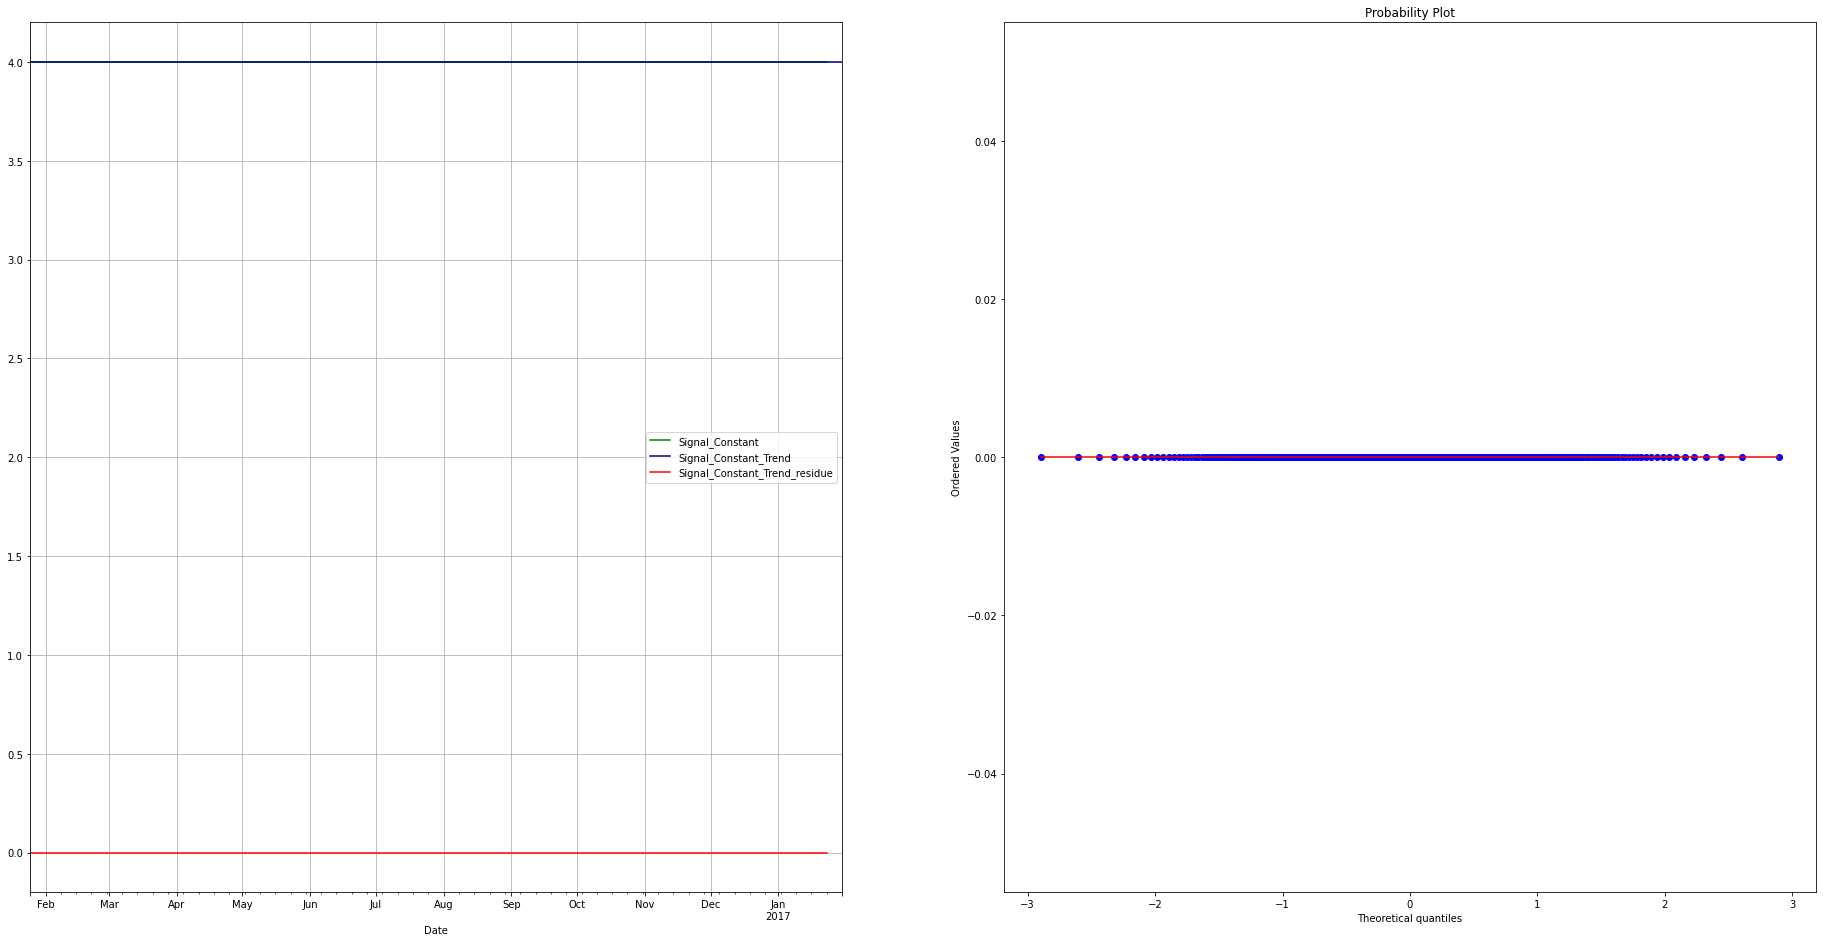

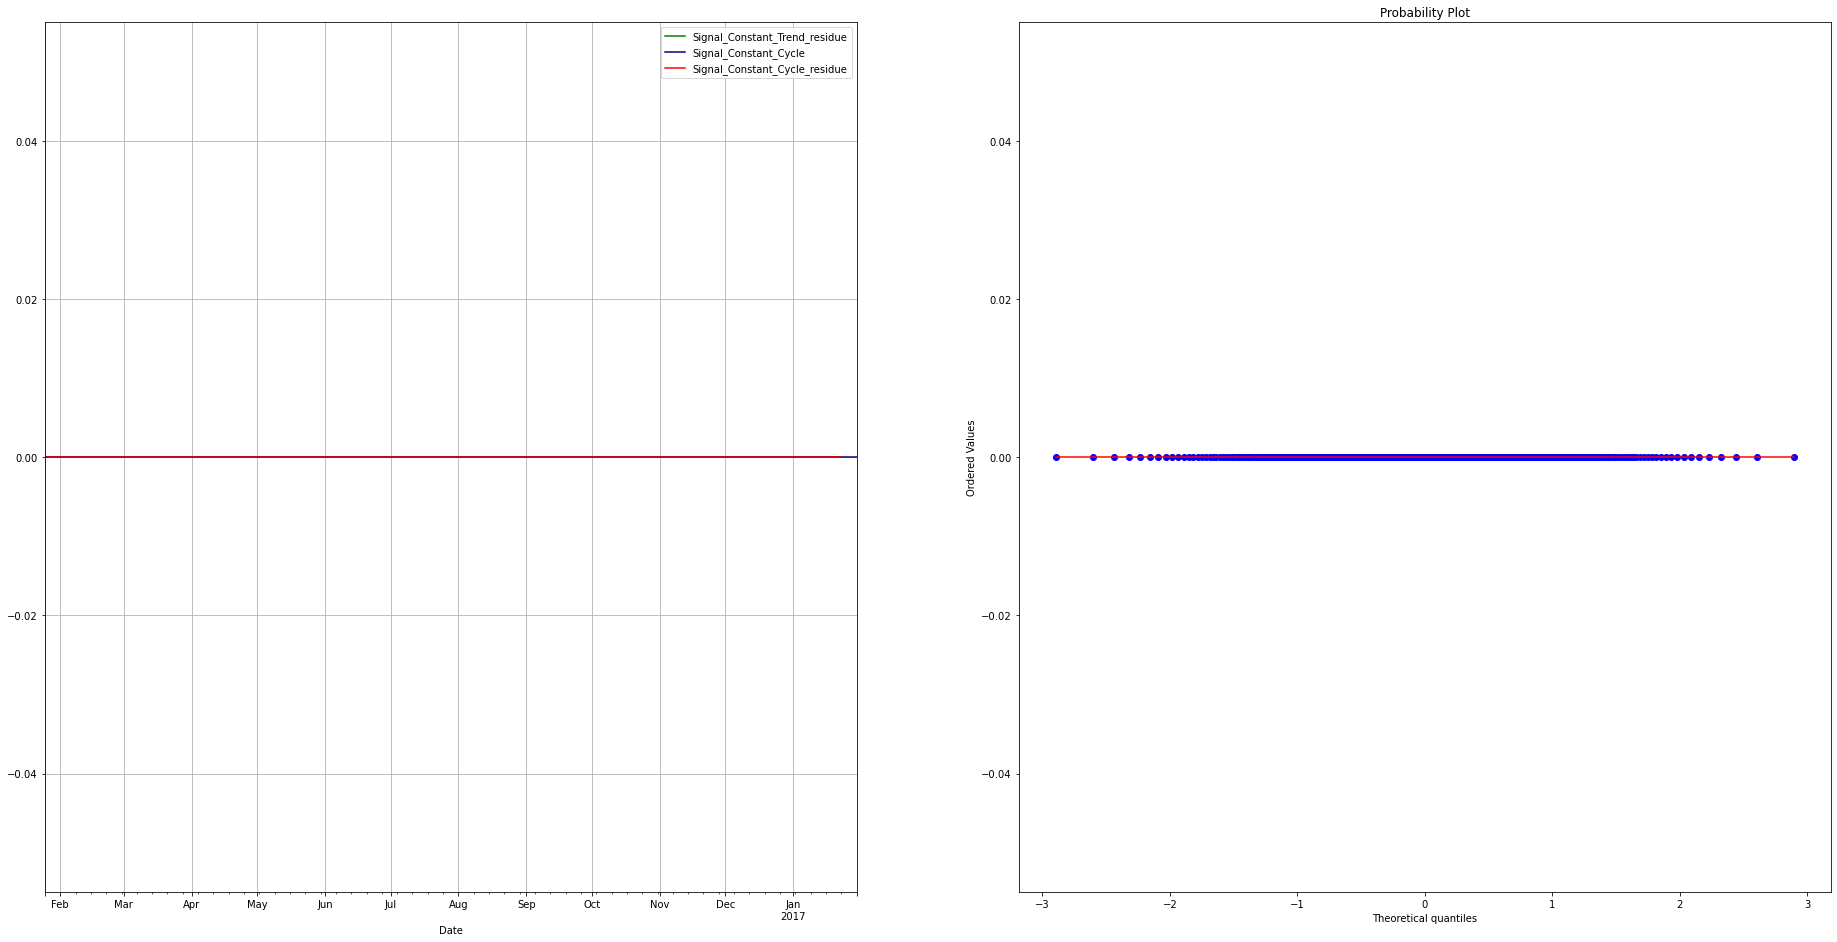

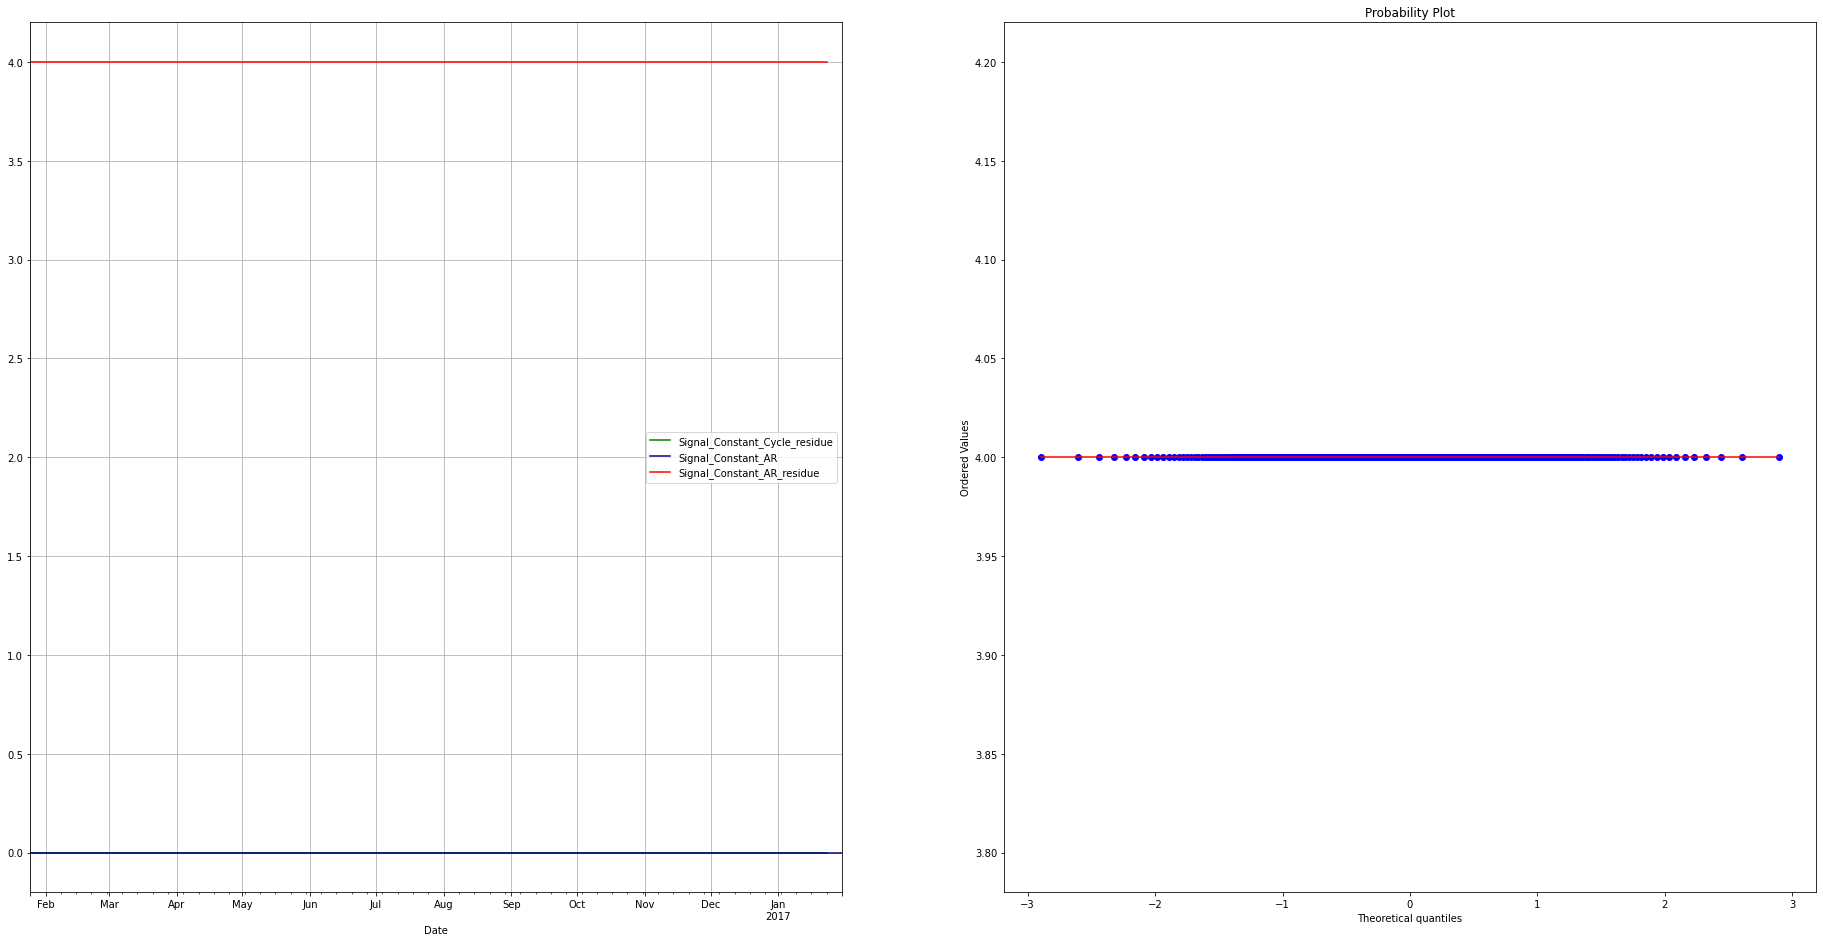

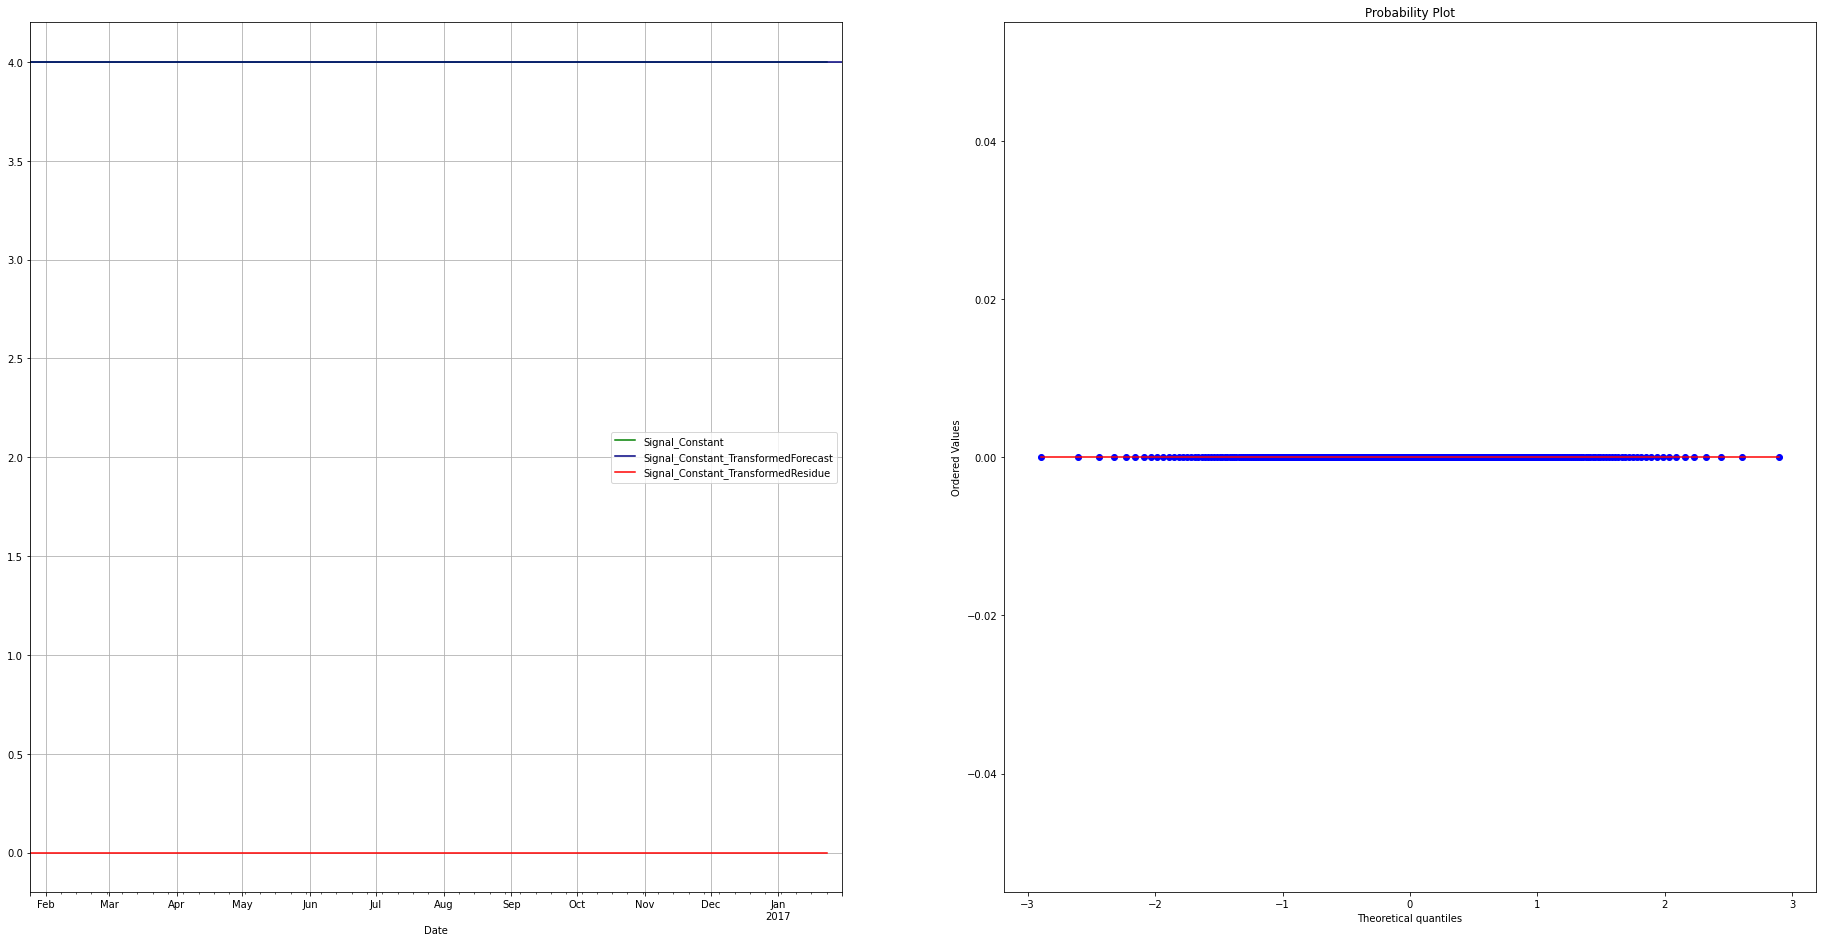

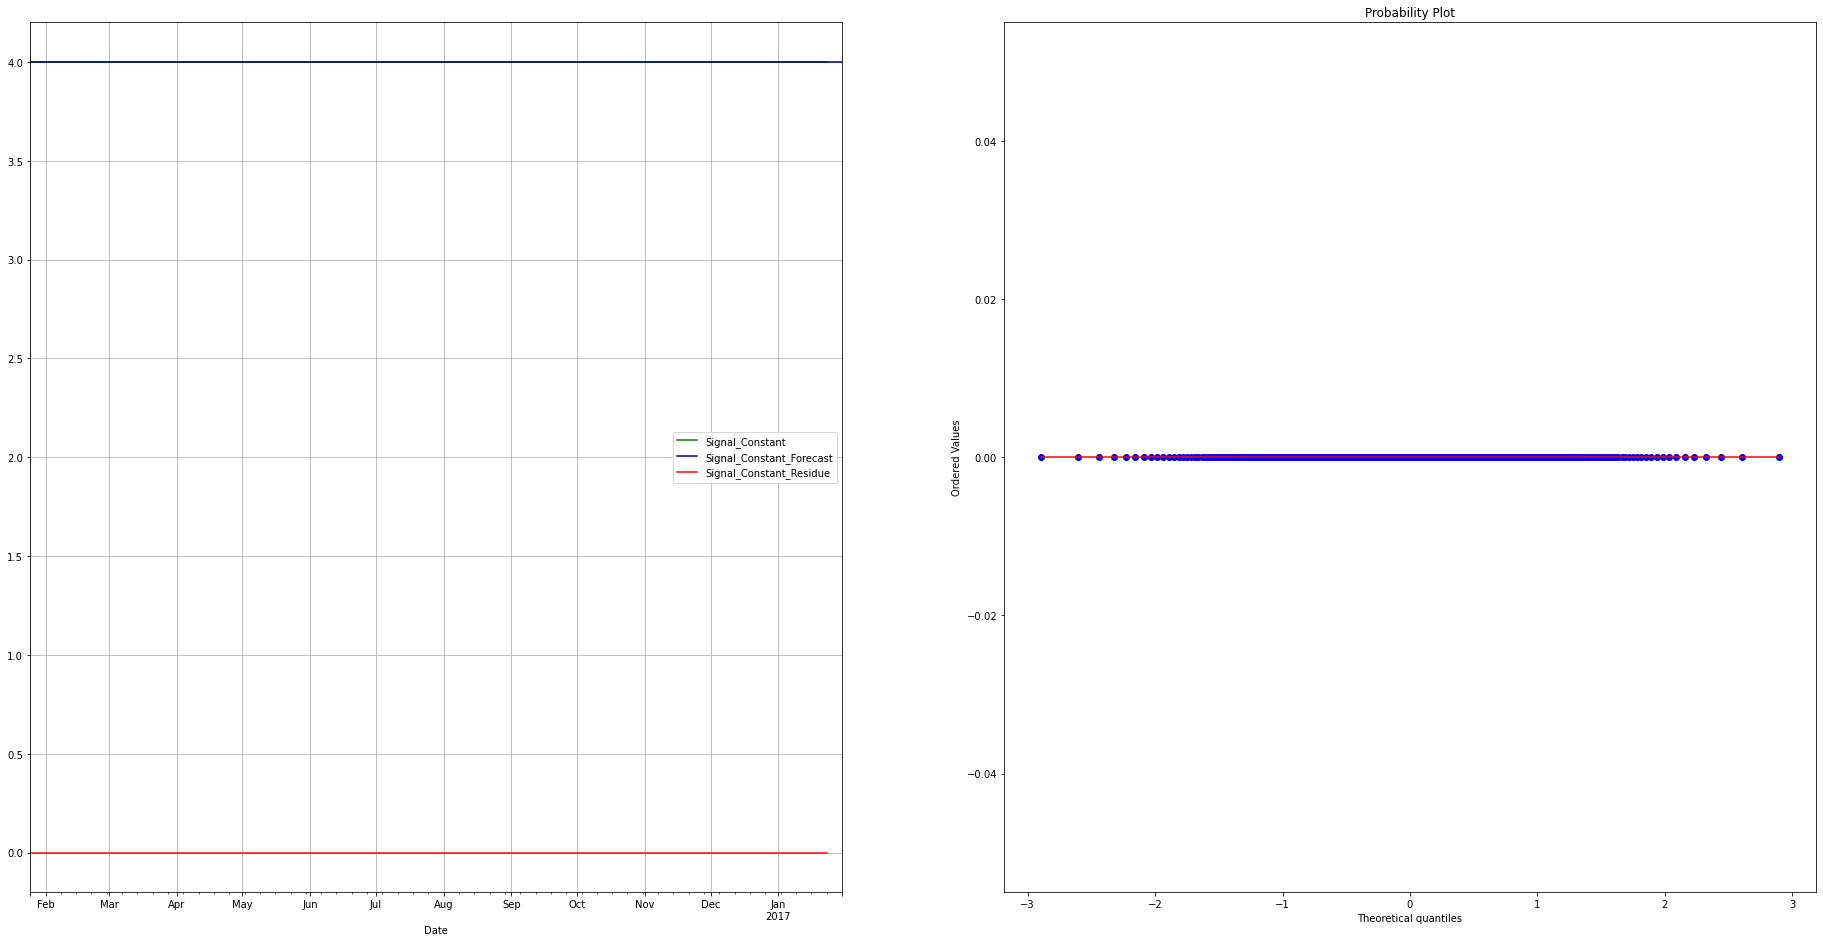

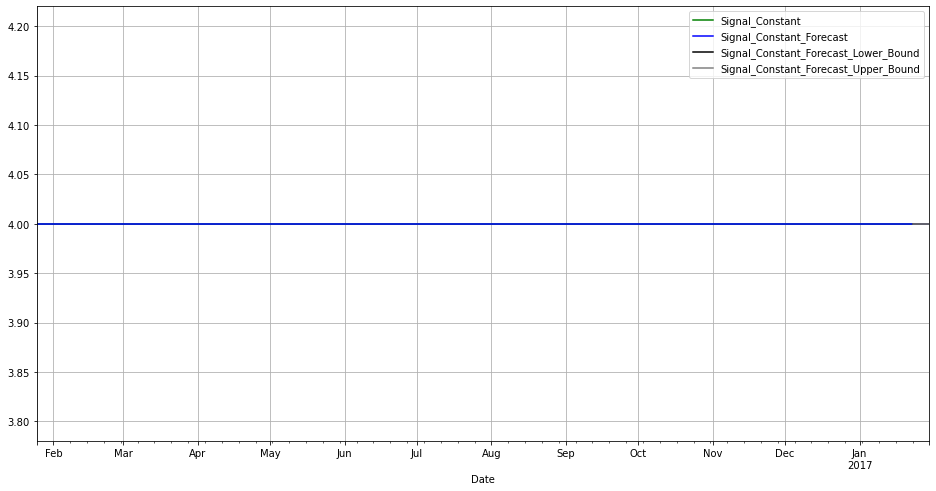

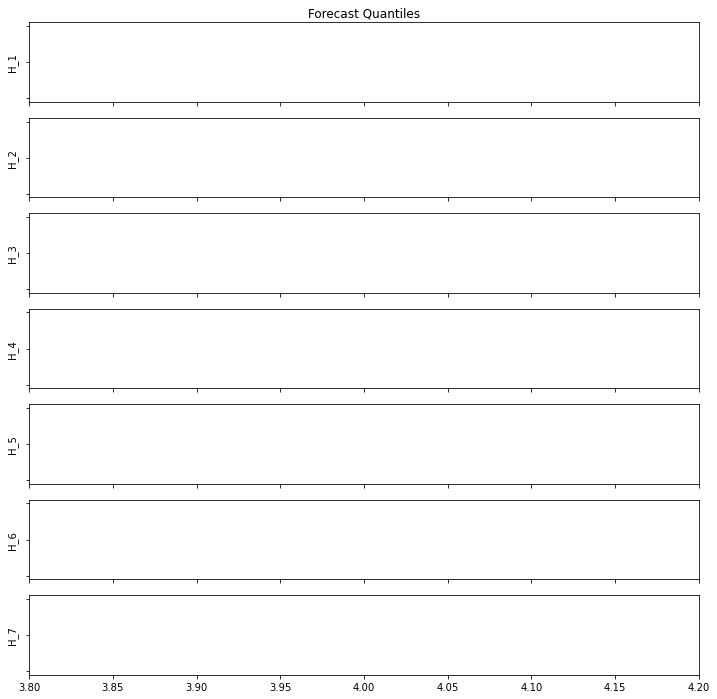

In [12]:
lEngine.standardPlots()